# 1. Pendahuluan

Notebook ini merupakan latihan praktik mengimplementasikan ANN tanpa package _Deep Learning_ (seperti keras dan tensor flow). Alasan mengapa dalam notebook ini kita tidak akan menggunakan package _Deep Learning_ yang tersedia karena target dari notebook ini adalah peserta dapat mengimplementasikan beberapa persamaan yang menjadi jantung dalam algoritma ANN, seperti:

1. Implementasi _Sigmoid Function_
2. Implementasi perhitungan _Score dan Prediction_
3. Implementasi _Error Function_
4. Implementasi _Gradient Descent_

Beberapa tahap akan dilalui untuk menyelesaikan notebook ini, antara lain:

1. Mempersiapkan perlengkapan yang akan diperlukan
2. Memuat dan mengenal dataset
3. Mempersiapkan beberapa fungsi yang akan diperlukan
4. Implementasi algoritma ANN (Training)
5. Kesimpulan

# 2. Mempersiapkan Perlengkapan yang Akan Diperlukan

## 2.1. Import Package

Beberapa fungsi berikut merupakan fungsi dasar yang umum digunakan dalam pemrograman machine learning. Terdapat empat buah package: numpy, pandas, matplotlib, dan seaborn.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.2. Fungsi Untuk Visualisasi

Fungsi berikut sudah dirancang untuk memudahkan kita untuk melakukan visualisasi. Saran dari saya, kalian tidak perlu memahami fungsi ini terlalu dalam, karena fokus notebook ini bukan untuk memahami fungsi ini, melainkan konsep fundamental dari implementasi **Artificial Neural Network**. Asumsikan saja beberapa fungsi ini telah dibuat oleh orang lain yang siap dipakai dalam projek kita sekarang.

In [3]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

---
# 3. Memuat dan Mengenal Dataset

Tahap ini umum dilakukan dalam pemrograman machine learning, guna memahami bagaimana rupa dataset yang kita miliki. Dalam notebook ini, dataset yang digunakan adalah berupa poin 2D yang dikelompokkan dengan dua buah label tertentu, 1 dan 0. Dataset disimpan dalam file berekstensi CSV, maka dari itu kita membutuhkan package _pandas_ untuk memuat dan melakukan eksplorasi data kita ini.

In [4]:
# kita load data kita
dataframe = pd.read_csv('example_data.csv')

# periksa tipe data dari variable data
type(dataframe)

pandas.core.frame.DataFrame

In [5]:
# lihat beberapa nilai yang paling atas
dataframe.head()

,x1,x2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


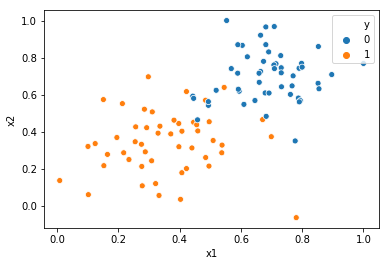

In [6]:
# tampilkan visualisasi sebaran data dalam grafik 2D
sns.scatterplot(x="x1", y="x2", data=dataframe, hue='y')

Untuk memudahkan operasi berikutnya, kita konversi dataframe yang kita miliki menjadi NumPy array

In [7]:
X = np.array(dataframe[['x1','x2']])
y = np.array(dataframe['y'])

---
# 4. Mempersiapkan Fungsi yang Diperlukan

Kita membutuhkan beberapa fungsi dasar untuk mendukung proses training ANN kita. Dalam tahap ini kita akan membuat empat buah fungsi yaitu:

1. _Sigmoid Function_
2. _Prediction_
3. _Error Function_
4. _Gradient Descent_

## 4.1. Sigmoid Activation Function

**Actvation function** merupakan fungsi yang mengubah _score_ menjadi nilai tertentu yang kemudian akan diteruskan ke neuron selanjutnya. Nilai tertentu ini umumnya merupakan sebuah probabilitas yang memiliki rentang [0,1]. _Activation function_ yang akan kita gunakan disini adalah _sigmoid function_. Tentu terdapat banyak _activation function_ yang dapat digunakan (seperti softmax, reLu softmax, tanh, dll), namun pada kasus kita sekarang, kita ingin melakukan binary classification dengan probabilitas terentu, sehingga _sigmoid function_ sudah cukup untuk menangani permasalahan ini. 

_Sigmoid function_ didefinisikan sebagai berikut:

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

Petunjuk spesifikasi fungsi:
- **Input** : 1 buah; numpy array yang tiap-tiap elemnnya merupakan _score_ yang didapatkan neuron pada layer sebelumnya.
- **Output** : 1 buah; numpy array yang tiap-tiap elemennya merupakan sebuah nilai probabilitas.


In [8]:
# implementasi fungsi aktivasi (sigmoid function)
def sigmoid(x):
    
    # persamaan sigmoid function
    return 1 / (1 + np.exp(-x))

## 4.2. Prediction

**Prediction** berupa sebuah nilai yang menunjukkan probabilitas input merupakan kelompok 1 atau kelompok 0. _Prediction_ dapat dilakukan dengan cara menghitung _score_ yang kemudian kita konversikan menjadi nilai probabilitas menggunakan fungsi _sigmoid_ yang telah kita implementasikan sebelumnya.

_Prediction_  didefinisikan sebagai berikut:

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

Petunjuk spesifikasi fungsi:
* **Input** : 3 buah; features (x1 dan x2), weights, dan bias. Ketiganya berupa numpy array.
* **Output** : 1 buah; numpy array yang tiap-tiap elemennya merupakan sebuah nilai prediksi.

In [9]:
# implementasi fungsi prediksi
def predict(features, weights, bias):
    
    # hitung score
    score = np.dot(features, weights)+bias
    
    # hitung probabilitas dan return
    return sigmoid(score)

## 4.3. Error Function

**Error Function** (kadang dikenal dengan _cost function_, _loss function_, _objective funtion_) merupakan sebuah fungsi yang menunjukkan seberapa buruk performa ANN kita. Semakin besar nilai _Error Function_ semakin buruk performa, dan berlaku sebaliknya. _Error function_ yang kita gunakan merupakan **Cross Entropy**, error function umum yang digunakand alam ANN dasar.

_Cross Entropy_ didefinisikasn sebagai berikut:

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

Petunjuk spesifikasi fungsi:
* **Input**: 2 buah; label dan nilai prediksi. Keduanya berupa numpy array.
* **Output**: 1 buah; numpy array yang tiap-tiap elemennya merupakan besar error tiap-tiap poin. 

In [10]:
# implementasi error function
def error_formula(y, prediction):
    
    # persamaan cross entropy
    return -y*np.log(prediction) - (1-y)*np.log(1-prediction)

## 4.4. Gradient Descent

**Gradient Descent** merupakan salah satu algoritma dalam _optimisasi matematis_. Ide dari algoritma ini kita ingin melakukan update weights dan bias (yang notabene merupakan variable pembentuk ANN kita) untuk mendapatkan nilai error dari _error function_ yang terkecil. Untuk menemukan _gradien_ dalam _surface solution_ yang dibentuk oleh _error function_ adalah dengan mencari _first order derivative_ dari _error function_ itu sendiri. Penurunan _first order derivative_ dari _error function_ dapat dilihat di lampiran.

Gradien didefinisikan sebagai berikut:


$$ w_i$$

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

Petunjuk spesifikasi fungsi:

* **Input**: 5 buah; Nilai input (X), label (y), prediksi (y_hat), weigths, bias, learn rate).
* **Output**: 2 buah; Weight dan bias yang sudah di perbaharui.

In [11]:
# Gradient descent step
def gradient_descent(X, y, predictions, weights, bias, learnrate):
    
    # kita cari y-yhat dimasukkan kedalam delta_error menghasilkan numpy array 1D berjumlah n
    delta_error = y-predictions
    
    # kita ubah bentuk delta_error dari numpy array 1D (n) menjadi numpy array 2D (nx1)
    # alasan kita lakukan ini agar kita dapat melakukan product antara delta_error dan X
    # dimensi delta_error = (nx1) ; dimensi X = (nx2)
    delta_error = delta_error.reshape([100, 1])
    
    # update weight dan bias
    weights = weights + np.sum(learnrate * delta_error * X, axis=0)
    bias = bias + learnrate * np.sum(delta_error, axis=0)
    
    # kembalikan dua buah nilai sekaligus ke fungsi
    return weights, bias

# 5. Implementasi ANN (Training)

Setelah kita mempersiapkan seluruhnya fungsi yang kita perlukan, saatnya kita implementasi ANN kita. Untuk merangkum teori yang telah dibahas sebelumnya, untuk melakukan training terdiri dari beberapa langkah berikut:

1. Inisialisasikan beberapa variable yang dibutuhkan oleh ANN.
2. Lakukan feedforward-propagation dengan _Prediction_.
3. Hitung besar error kita dengan _Error Function_.
4. Update _weights_ dan _bias_ dengan _Gradient Descent_.
5. Visualisasikan apa yang terjadi.
6. Ulangi langkah 2 sampai 5 sampai iterasi yang telah ditentukan.

epoch = 00, loss = 0.784, persamaan garis -0.08x + -0.08y + -0.10 = 0
epoch = 01, loss = 0.741, persamaan garis -0.18x + -0.18y + -0.13 = 0
epoch = 02, loss = 0.718, persamaan garis -0.26x + -0.26y + -0.13 = 0
epoch = 03, loss = 0.703, persamaan garis -0.33x + -0.33y + -0.11 = 0
epoch = 04, loss = 0.692, persamaan garis -0.40x + -0.40y + -0.07 = 0
epoch = 05, loss = 0.682, persamaan garis -0.45x + -0.45y + -0.03 = 0
epoch = 06, loss = 0.672, persamaan garis -0.51x + -0.51y + 0.02 = 0
epoch = 07, loss = 0.663, persamaan garis -0.56x + -0.56y + 0.07 = 0
epoch = 08, loss = 0.655, persamaan garis -0.60x + -0.60y + 0.13 = 0
epoch = 09, loss = 0.646, persamaan garis -0.65x + -0.65y + 0.18 = 0
epoch = 10, loss = 0.638, persamaan garis -0.70x + -0.70y + 0.23 = 0
epoch = 11, loss = 0.630, persamaan garis -0.74x + -0.74y + 0.29 = 0
epoch = 12, loss = 0.622, persamaan garis -0.79x + -0.79y + 0.34 = 0
epoch = 13, loss = 0.615, persamaan garis -0.83x + -0.83y + 0.39 = 0
epoch = 14, loss = 0.607, pe

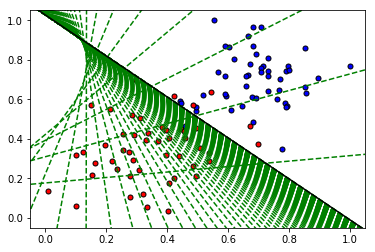

In [17]:
# inisialisasikan beberapa variable yang dibutuhkan oleh ANN
weights = np.random.rand(2)
bias = 0

# learn rate merupakan variable alpha pada persamaan gradient descent
learnrate = 0.01

# epoch merupakan jumlah iterasi yang digunakan dalam melakukan gradient descent
epoch = 100

# lakukan iterasi sejumlah nilai epoch
for i in range(100):
    
    # kalkulasi prediksi (y_hat)
    predictions = predict(X, weights, bias)
    
    # hitung berapa nilai loss yang kita punya dengan melakukan mean 
    loss = np.mean(error_formula(y, predictions))
    
    # lakukan perbaharuan nilai weights dan bias menggunakan gradient descent
    weights, bias = gradient_descent(X, y, predictions, weights, bias, learnrate)
    
    # tampilkan informasi yang dibutuhkan untuk melihat apa yg sebenarnya terjadi saat proses gradient descent 
    display(-weights[0]/weights[1], -bias/weights[1])
    print('epoch = %02d, loss = %.3f, persamaan garis %.2fx + %.2fy + %.2f = 0' %
          (i, loss, weights[0], weights[0], bias) )

# tampilkan visualisasi hasil akhir
display(-weights[0]/weights[1], -bias/weights[1], 'black')
plot_points(X, y)

# 6. Kesimpulan

Kita bisa lihat dari _snippet code_ diatas, error function kita memberikan nilai _loss_ yang semakin lama semakin kecil. Itu menunjukkan bahwa persamaan garis yang kita dapatkan semakin tepat melakukan klasifikasi poin biru dan poin merah kita.

Kita juga bisa melihat performa ANN kita secara kualitatif, yakni dari visualisasi yang muncul. Garis berwarna hijau putus-putus merupakan garis batas yang diestimasikan oleh ANN. Kita dapat melihat bahwa garis tersebut berangsur-angsur memisahkan kelompok poin biru dan merah dengan baik.

Pada akhirnya, dengan menggunakan ANN, kita bisa melakukan estimasi persamaan garis, yakni nilai yang tertera pada baris akhir dari output snippet diatas